## Libraries

In [3]:
from enum import Enum
import copy
import random
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
%matplotlib inline 

from environment import *
from mc import *
from td import *
from linearApprox import *

random.seed(1)

In [2]:
N0 = 100
mlambda = 1
agent = Linear_Approximation_Agent(Environment(), N0, mlambda, gamma=1)
agent.train(10000)

100%|██████████| 10000/10000 [00:01<00:00, 7923.43it/s]

48.66


## Monte-Carlo Control in Easy21

Apply Monte-Carlo control to Easy21. Initialise the value function to zero. Use a time-varying scalar step-size of αt = 1/N(st,at) and an ε-greedy exploration strategy with εt = N0/(N0 + N(st)), where N0 = 100 is a constant, N(s) is the number of times that state s has been visited, and N(s,a) is the number of times that action a has been selected from state s. Feel free to choose an alternative value for N0, if it helps producing better results. Plot the optimal value function V ∗ (s) = maxa Q∗ (s, a) using similar axes to the following figure taken from Sutton and Barto’s Blackjack example.

In [4]:
mc_agent = MC_Agent(Environment(), 100)
mc_agent.train(100)

100%|██████████| 100/100 [00:00<00:00, 9834.93it/s]


In [5]:
def animate(frame):
    i = agent.iterations
    step_size = i
    step_size = max(1, step_size)
    step_size = min(step_size, 2 ** 16)
    agent.train(step_size, disable_logging=True)

    ax.clear()
    surf =  agent.plot_frame(ax)
    plt.title('MC score:%s frame:%s step_size:%s ' % (float(agent.count_wins)/agent.iterations*100, frame, step_size) )
    # plt.draw()
    fig.canvas.draw()
    return surf

MovieWriter imagemagick unavailable; using Pillow instead.


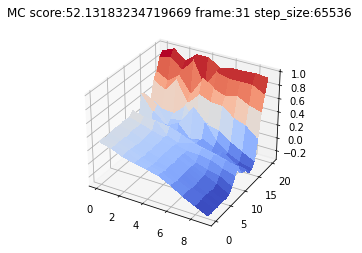

In [6]:
N0 = 100
agent = MC_Agent(Environment(), N0)
fig = plt.figure("N100")
ax = fig.add_subplot(111, projection='3d')

ani = animation.FuncAnimation(fig, animate, 32, repeat=False)

# note: requires gif writer; swap with plt.show()
ani.save('MC_Agent.gif', writer='imagemagick', fps=3)
# plt.show()

In [8]:
N0 = 100
agent = Linear_Approximation_Agent(Environment(), N0,1,0.5)
fig = plt.figure("N100")
ax = fig.add_subplot(111, projection='3d')

ani = animation.FuncAnimation(fig, animate, 32, repeat=False)

# note: requires gif writer; swap with plt.show()
ani.save('MC_Agent.gif', writer='imagemagick', fps=3)
# plt.show()

MovieWriter imagemagick unavailable; using Pillow instead.


0.0
100.0
100.0
100.0
75.0
62.5
87.5
96.875
104.6875
101.953125
99.4140625
99.4140625
98.828125
94.482421875
94.15283203125
93.6279296875
93.3441162109375


/Users/yeungadrian/Documents/repo/OnlineLearning/Introduction to Reinforcement Learning/linearApprox.py:118: RuntimeWarning: overflow encountered in add
  self.theta = self.theta + self.Q


86.20758056640625
91.8212890625
97.66387939453125
103.57513427734375
109.22698974609375
114.9444580078125


## TD Learning in Easy21

Run the algorithm with parameter values λ ∈ {0, 0.1, 0.2, ..., 1}. Stop each run after 1000 episodes
2
 
and report the mean-squared error Sums,a(Q(s, a) − Q∗(s, a))2 over all states s and actions a, comparing the true values Q∗(s,a) computed in the previous section with the estimated values Q(s, a) computed by Sarsa.

Plot the mean- squared error against λ.

In [ ]:
mc_agent = MC_Agent(Environment(), 100)
mc_agent.train(1000000)

N0 = 100
lambda_list = [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
mse_list = []
n_elements = mc_agent.Q.shape[0]*mc_agent.Q.shape[1]*2
for mlambda in lambda_list:
    agent = TD_Agent(Environment(), N0, mlambda, 1)

    agent.train(1000,disable_logging = True)
    mse = np.sum(np.square(agent.Q-mc_agent.Q))/float(n_elements)
    mse_list.append(mse)

fig = plt.figure("N100")
surf = plt.plot(lambda_list[0:11], mse_list[0:11])

plt.show()

For λ = 0 and λ = 1 only, plot the learning curve of mean-squared error against episode number.

In [ ]:
N0 = 100
mlambda = 0.0
mse_list = []
episode_number = range(1000)
n_elements = len(mc_agent.Q)
agent = TD_Agent(Environment(), N0, mlambda, gamma=1)
for i in episode_number:
    agent.train(1,disable_logging = True)
    mse = np.sum(np.square(agent.Q-mc_agent.Q))/float(1000)
    mse_list.append(mse)

fig = plt.figure("0.0")
surf = plt.plot( episode_number,mse_list)
plt.show()

In [ ]:
N0 = 100
mlambda = 1.0
mse_list = []
episode_number = range(1000)
n_elements = len(mc_agent.Q)
agent = TD_Agent(Environment(), N0, mlambda, gamma=1)
for i in episode_number:
    agent.train(1,disable_logging = True)
    mse = np.sum(np.square(agent.Q-mc_agent.Q))/float(1000)
    mse_list.append(mse)

fig = plt.figure("1.0")
surf = plt.plot( episode_number,mse_list)
plt.show()

## Linear Function Approximation in Easy21

We now consider a simple value function approximator using coarse coding. Use a binary feature vector φ(s, a) with 3 ∗ 6 ∗ 2 = 36 features. Each binary feature has a value of 1 iff (s, a) lies within the cuboid of state-space corresponding to that feature, and the action corresponding to that feature. The cuboids have the following overlapping intervals:
dealer(s) = {[1, 4], [4, 7], [7, 10]}
player(s) = {[1, 6], [4, 9], [7, 12], [10, 15], [13, 18], [16, 21]}
a = {hit, stick}
where
• dealer(s) is the value of the dealer’s first card (1–10) • sum(s) is the sum of the player’s cards (1–21)
Repeat the Sarsa(λ) experiment from the previous section, but using linear value function approximation Q(s, a) = φ(s, a)⊤θ. Use a constant exploration of ε = 0.05 and a constant step-size of 0.01. Plot the mean-squared error against λ. For λ = 0 and λ = 1 only, plot the learning curve of mean-squared error against episode number.

In [ ]:
N0 = 100
mlambda = 0.0
mse_list = []
episode_number = range(1000)
n_elements = len(mc_agent.Q)
agent = Linear_Approximation_Agent(Environment(), N0, mlambda, gamma=1)
for i in episode_number:
    agent.train(1,disable_logging = True)
    mse = np.sum(np.square(agent.Q-mc_agent.Q))/float(1000)
    mse_list.append(mse)

fig = plt.figure("0.0")
surf = plt.plot( episode_number,mse_list)
plt.show()

In [ ]:
N0 = 100
mlambda = 1.0
mse_list = []
episode_number = range(1000)
n_elements = len(mc_agent.Q)
agent = Linear_Approximation_Agent(Environment(), N0, mlambda, gamma=1)
for i in episode_number:
    agent.train(1,disable_logging = True)
    mse = np.sum(np.square(agent.Q-mc_agent.Q))/float(1000)
    mse_list.append(mse)

fig = plt.figure("1.0")
surf = plt.plot( episode_number,mse_list)
plt.show()